In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import quandl

```python
quandl.ApiConfig.api_key = 'VzDRqBsf_dacrLdzybNJ'
```

```python
import feather

swap_names = ['FRED/DSWP1', 
             'FRED/DSWP2', 
             'FRED/DSWP3', 
             'FRED/DSWP4', 
             'FRED/DSWP5', 
             'FRED/DSWP7', 
             'FRED/DSWP10', 
             'FRED/DSWP30']

swap_df = quandl.get(swap_names)
swap_df = swap_df.dropna()
swap_df.columns = ["SWAP1",
                  "SWAP2",
                  "SWAP3",
                  "SWAP4",
                  "SWAP5",
                  "SWAP7",
                  "SWAP10",
                  "SWAP30"]

swap_df.reset_index().to_feather('/tmp/swap_df.feather')
```

In [28]:
swap_df = pd.read_feather('/tmp/swap_df.feather').set_index('DATE')

,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10,SWAP30
DATE,,,,,,,,
2000-07-03,4.994245,4.769782,4.48181,4.216918,3.988605,3.665228,3.367455,2.845159
2000-07-05,4.924245,4.669782,4.38181,4.116918,3.898605,3.575228,3.267455,2.765159
2000-07-06,4.964245,4.739782,4.45181,4.196918,3.978605,3.655228,3.337455,2.815159
2000-07-07,4.904245,4.649782,4.37181,4.106918,3.888605,3.565228,3.267455,2.745159
2000-07-10,4.934245,4.699782,4.42181,4.176918,3.958605,3.635228,3.327455,2.795159


In [23]:
swap_df.tail()

,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10,SWAP30
DATE,,,,,,,,
2016-10-24,-1.115755,-1.310218,-1.53819,-1.733082,-1.881395,-2.104772,-2.262545,-2.434841
2016-10-25,-1.105755,-1.310218,-1.53819,-1.733082,-1.891395,-2.114772,-2.282545,-2.464841
2016-10-26,-1.095755,-1.290218,-1.50819,-1.703082,-1.851395,-2.064772,-2.232545,-2.414841
2016-10-27,-1.105755,-1.280218,-1.48819,-1.663082,-1.801395,-2.004772,-2.162545,-2.324841
2016-10-28,-1.105755,-1.290218,-1.49819,-1.673082,-1.821395,-2.014772,-2.162545,-2.324841


In [7]:
swap_df2 = swap_df.copy()

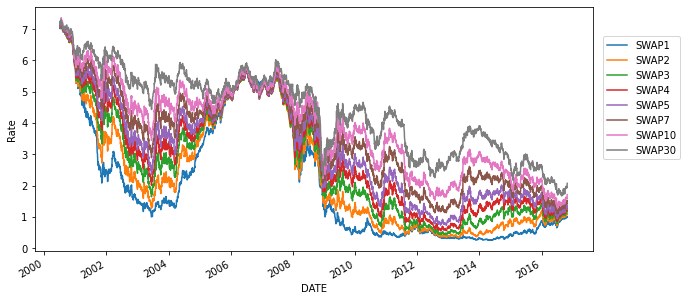

In [8]:
swap_df.plot(figsize=(10,5))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

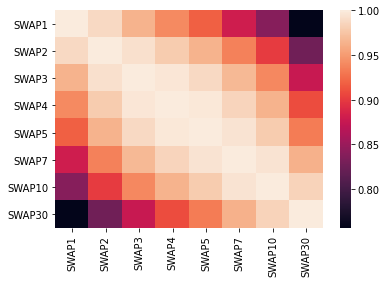

In [9]:
sns.heatmap(swap_df.corr())
plt.show()

In [10]:
def PCA(df, num_reconstruct):
    
    df -= df.mean(axis=0)
    R = np.cov(df, rowvar=False)
    eigenvals, eigenvecs = sp.linalg.eigh(R)
    eigenvecs = eigenvecs[:, np.argsort(eigenvals)[::-1]]
    eigenvals = eigenvals[np.argsort(eigenvals)[::-1]]
    eigenvecs = eigenvecs[:, :num_reconstruct]

    return np.dot(eigenvecs.T, df.T).T, eigenvals, eigenvecs

In [11]:
scores, evals, evecs = PCA(swap_df, 7)

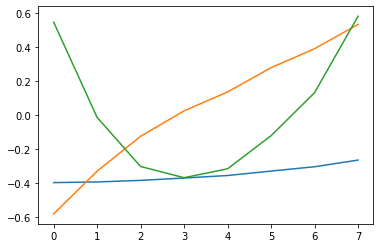

In [15]:
evecs = pd.DataFrame(evecs)
plt.plot(evecs.iloc[:, 0:3])
plt.show()

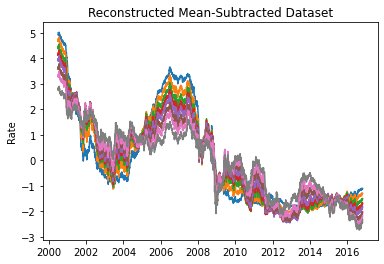

In [16]:
reconst = pd.DataFrame(np.dot(scores,evecs.T), index=swap_df.index, columns=swap_df.columns)

plt.plot(reconst)
plt.ylabel("Rate")
plt.title("Reconstructed Mean-Subtracted Dataset")
plt.show()

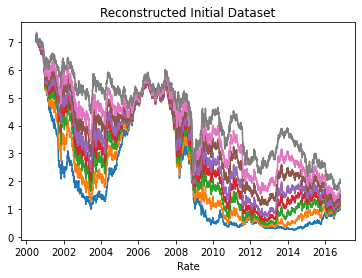

In [17]:
for cols in reconst.columns:
    reconst[cols] = reconst[cols] + swap_df2.mean(axis=0)[cols]
    
plt.plot(reconst)
plt.xlabel("Rate")
plt.title("Reconstructed Initial Dataset")
plt.show()

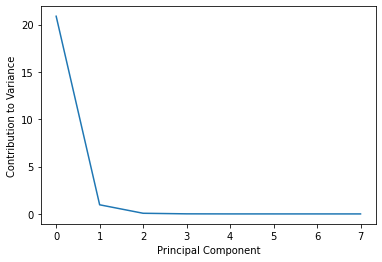

In [20]:
plt.plot(evals)
plt.ylabel("Contribution to Variance")
plt.xlabel("Principal Component")
plt.show()